Here we are working only on the probalities and the functionality of Softmax and crossentorypy 

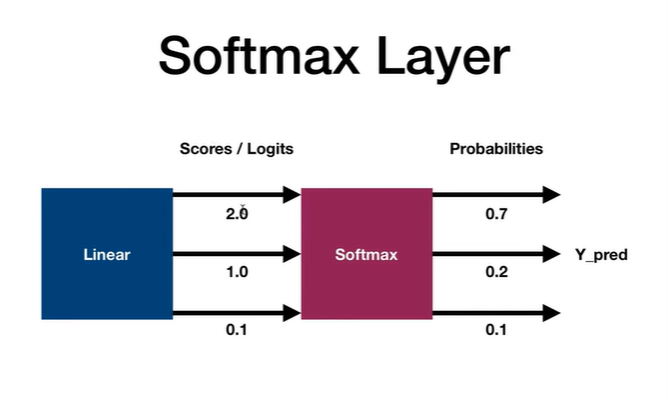  
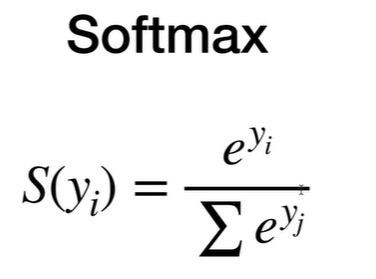

In [6]:
import torch
import torch.nn as nn
import numpy as np

Numpy

In [2]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)


x = np.array([2.0, 1.0, 1.0])
outputs = softmax(x)

print("softmax numpy:", outputs)

softmax numpy: [0.57611688 0.21194156 0.21194156]


torch

In [3]:
x = torch.tensor([2.0, 1.0, 1.0])
y = torch.softmax(x, dim=0)

print(y)


tensor([0.5761, 0.2119, 0.2119])


### Cross Entropy


```
nn.CrossEntropyLoss applies nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)

-> no Softmax in last layer!
Y has class labels, no One-Hot encoding!
Y_pred has raw scores(logits), no Softmax!

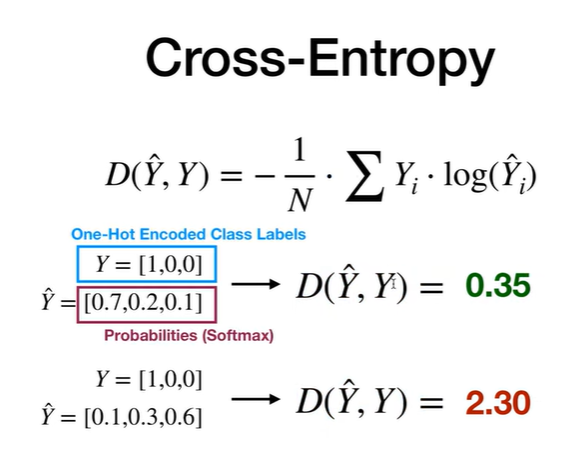

numpy

In [4]:
def cross_entropy(actual, predited):
    loss = -np.sum(actual * np.log(predited))
    return loss # / float(predicted.shape[0])

In [5]:
# y must be one of encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1,0,0])

#y_pred has probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}') #will be low loss
print(f'Loss2 numpy: {l2:.4f}') # high loss

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


torch

In [7]:
loss = nn.CrossEntropyLoss()

In [14]:
# one sample

Y = torch.tensor([0])

# nsamples x nclasses = 1X3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y) # very less loss for class -> 0
l2 = loss(Y_pred_bad, Y)  # very high loss for class -> 0

print(l1.item())
print(l2.item())

0.4170299470424652
1.840616226196289


In [15]:
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1)
print(predictions2)

tensor([0])
tensor([1])


In [16]:
# one sample

Y = torch.tensor([2, 0, 1])

# nsamples x nclasses = 1X3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y) # very less loss for class -> 0
l2 = loss(Y_pred_bad, Y)  # very high loss for class -> 0

print(l1.item())
print(l2.item())

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1)
print(predictions2)

0.3018244206905365
1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])
